In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc, f1_score, precision_score, recall_score

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# Train section

In [ ]:
train_trans = pd.read_csv('/content/drive/MyDrive/Dataset/ieee-fraud-detection/train_transaction.csv')

In [ ]:
train_trans = reduce_mem_usage(train_trans)

Mem. usage decreased to 542.35 Mb (69.4% reduction)


In [ ]:
train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_id = pd.read_csv('/content/drive/MyDrive/Dataset/ieee-fraud-detection/train_identity.csv')

In [ ]:
train_id = reduce_mem_usage(train_id)

Mem. usage decreased to 25.86 Mb (42.7% reduction)


In [ ]:
train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
train_df = pd.merge(train_trans, train_id, on='TransactionID', how='left')

In [ ]:
del train_trans, train_id

In [ ]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
train_df.shape

(590540, 434)

In [ ]:
train_df.isnull().sum().sum()

115523073

In [ ]:
missing_count = train_df.isnull().sum()
missing_percentage = train_df.isnull().sum()*100/len(train_df)
missing_df = pd.DataFrame({
                                 'missing_count': missing_count,
                                 'missing_percentage %': missing_percentage})
frame = pd.DataFrame(missing_df)
frame

,missing_count,missing_percentage %
TransactionID,0,0.000000
isFraud,0,0.000000
TransactionDT,0,0.000000
TransactionAmt,0,0.000000
ProductCD,0,0.000000
...,...,...
id_36,449555,76.126088
id_37,449555,76.126088
id_38,449555,76.126088
DeviceType,449730,76.155722


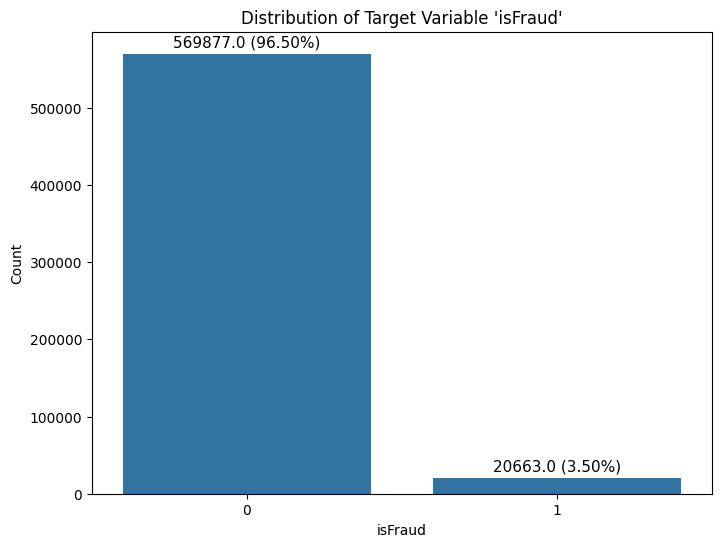

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='isFraud', data=train_df)
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.title("Distribution of Target Variable 'isFraud'")

# Calculate and display the count and percentage on top of each bar
total = len(train_df)  # Total number of samples
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{count} ({percentage:.2f}%)',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='baseline',
                fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
train_df.fillna(0, inplace=True)

In [ ]:
train_df.isnull().sum().sum()

0

In [ ]:
train_df.isna().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,0
id_37,0
id_38,0
DeviceType,0


In [ ]:
label_encoder = LabelEncoder()

for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = label_encoder.fit_transform(train_df[col].astype(str))

In [ ]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,4,13926,0.0,150.0,2,142.0,...,0,0.0,0,0,0,0,0,0,0,0
1,2987001,0,86401,29.0,4,2755,404.0,150.0,3,102.0,...,0,0.0,0,0,0,0,0,0,0,0
2,2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,...,0,0.0,0,0,0,0,0,0,0,0
3,2987003,0,86499,50.0,4,18132,567.0,150.0,3,117.0,...,0,0.0,0,0,0,0,0,0,0,0
4,2987004,0,86506,50.0,1,4497,514.0,150.0,3,102.0,...,124,32.0,165,4,2,1,2,2,2,955


In [ ]:
x = train_df.drop('isFraud', axis=1)
y = train_df['isFraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9792562739187862


In [ ]:
precision_score = precision_score(y_test, y_pred)
print("Precision Score:", precision_score)
f1_score = f1_score(y_test, y_pred)
print("F1 Score:", f1_score)
recall_score = recall_score(y_test, y_pred)
print("Recall Score:", recall_score)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Precision Score: 0.9493480441323972
F1 Score: 0.6071199486850545
Recall Score: 0.44625176803394623
Confusion Matrix:
[[113765    101]
 [  2349   1893]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [2,32],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
# Use the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_


In [ ]:
# Evaluate the best estimator on the test data
y_pred_best = best_rf_classifier.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best estimator:", accuracy_best)

In [ ]:
import xgboost as xgb


In [ ]:
from ast import mod
mod = xgb.XGBClassifier(n_estimators=100, random_state=42)
mod.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = mod.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.9806787008500695


# Test Section

In [ ]:
test_trans = pd.read_csv('/content/drive/MyDrive/Dataset/ieee-fraud-detection/test_transaction.csv')

In [ ]:
test_trans = reduce_mem_usage(test_trans)

Mem. usage decreased to 472.59 Mb (68.9% reduction)


In [ ]:
test_trans.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,285.000000,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.937500,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_id = pd.read_csv('/content/drive/MyDrive/Dataset/ieee-fraud-detection/test_identity.csv')

In [ ]:
test_id = reduce_mem_usage(test_id)

Mem. usage decreased to 25.44 Mb (42.7% reduction)


In [ ]:
test_id.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [ ]:
test_df = pd.merge(test_trans, test_id, on='TransactionID', how='left')

In [ ]:
del test_trans, test_id

In [ ]:
test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,285.000000,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.937500,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_df.shape

(506691, 433)

In [ ]:
test_df.isnull().sum().sum()

90186908

In [ ]:
#test_df.fillna(0, inplace=True)

In [ ]:
missing_count = test_df.isnull().sum()
missing_percentage = test_df.isnull().sum()*100/len(test_df)
missing_df = pd.DataFrame({
                                 'missing_count': missing_count,
                                 'missing_percentage %': missing_percentage})
frame_test = pd.DataFrame(missing_df)
frame_test

,missing_count,missing_percentage %
TransactionID,0,0.000000
TransactionDT,0,0.000000
TransactionAmt,0,0.000000
ProductCD,0,0.000000
card1,0,0.000000
...,...,...
id-36,369714,72.966364
id-37,369714,72.966364
id-38,369714,72.966364
DeviceType,369760,72.975443


In [ ]:
print(missing_percentage[missing_percentage > 50])

dist1            57.474279
dist2            92.809030
R_emaildomain    73.184840
D6               75.372959
D7               88.132215
                   ...    
id-36            72.966364
id-37            72.966364
id-38            72.966364
DeviceType       72.975443
DeviceInfo       77.292472
Length: 210, dtype: float64


In [ ]:
test_df.drop(missing_percentage[missing_percentage > 50].index, axis=1, inplace=True)

In [ ]:
test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,...,0.000000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,77.000000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,0.000000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,263.0,0.0
3,3663552,18403310,285.000000,W,10989,360.0,150.0,visa,166.0,debit,...,0.000000,282.5000,282.500,282.5000,0.0,0.0,0.0,0.0,0.0,0.0
4,3663553,18403317,67.937500,W,18018,452.0,150.0,mastercard,117.0,debit,...,67.949997,67.9375,183.875,67.9375,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.isnull().sum()

,0
TransactionID,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
card1,0
...,...
V317,3
V318,3
V319,3
V320,3


In [ ]:
test_df.fillna(0, inplace=True)

In [ ]:
test_df.isnull().sum().sum()

0

In [ ]:
label_encoder = LabelEncoder()

for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = label_encoder.fit_transform(test_df[col].astype(str))

In [ ]:
test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,3663549,18403224,31.953125,4,10409,111.0,150.0,4,226.0,3,...,0.000000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,3663550,18403263,49.000000,4,4272,111.0,150.0,4,226.0,3,...,77.000000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,3663551,18403310,171.000000,4,4476,574.0,150.0,4,226.0,3,...,0.000000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.0,263.0,0.0
3,3663552,18403310,285.000000,4,10989,360.0,150.0,4,166.0,3,...,0.000000,282.5000,282.500,282.5000,0.0,0.0,0.0,0.0,0.0,0.0
4,3663553,18403317,67.937500,4,18018,452.0,150.0,3,117.0,3,...,67.949997,67.9375,183.875,67.9375,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Ensure the same columns are present in test_df as in the training data
# AND in the same order
test_df = test_df[[col for col in x_train.columns if col in test_df.columns]]

In [ ]:
# Ensure the same columns are present in test_df as in the training data
for column in x_train.columns:
  if column not in test_df.columns:
    test_df[column] = 0

In [ ]:
y_pred_test = rf_classifier.predict(test_df)

In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
submission_df = pd.DataFrame({'TransactionID': test_df['TransactionID'], 'isFraud': y_pred_test})

In [ ]:
submission_df

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,0
506687,4170236,0
506688,4170237,0
506689,4170238,0
